# **Proposta de Trabalho 1 - Mineração de dados**

### **Professor:** Wagner Meira Jr.
### **Alunos:** Carlos Henrique Brito Malta Leão | Vinícius Alves de Faria Resende
### **Matrículas:** 2021039794 | 2021039972

### **Tema:** ENEM 2022: O Impacto das Características Socioeconômicas no Desempenho dos Candidatos
### **Base de dados:** https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem


In [1]:
# Bibliotecas usadas no projeto
import pandas as pd
import matplotlib.pyplot as plt

##**2. Data understanding (Entendimento dos dados)**


In [2]:
# Carregando a base de dados
raw_df = pd.read_csv('MICRODADOS_ENEM_2022.csv', encoding='latin-1', sep=';')

Não presentes ou eliminados ciências da natureza:  1120710
Não presentes ou eliminados ciências humanas:  982663
Não presentes ou eliminados linguagens e códigos:  982663
Não presentes ou eliminados matemática:  1120710
Não presentes ou eliminados em todas as provas:  972091


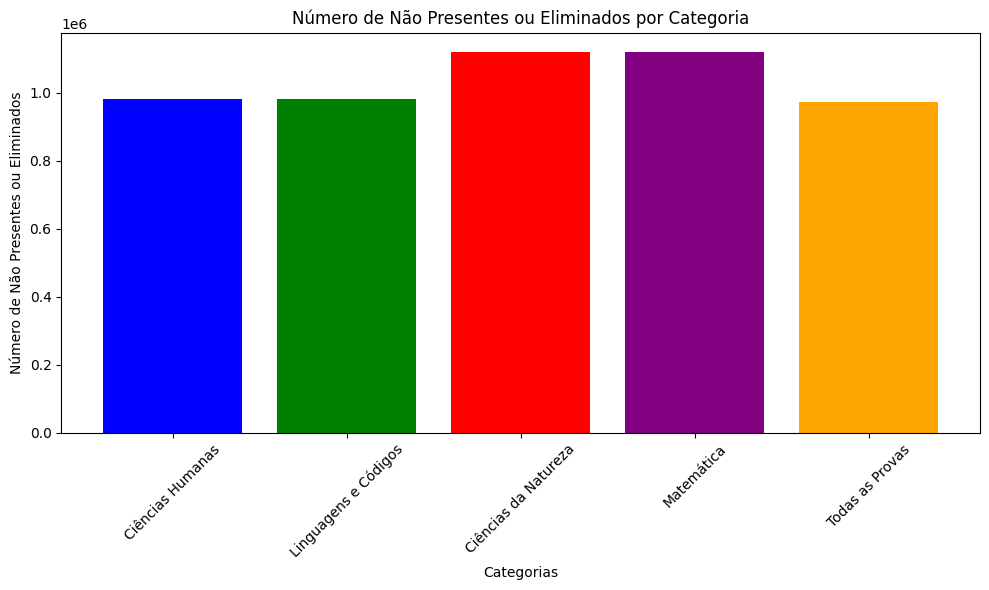

In [3]:
# Verifica a não presença ou eliminação de participantes
mask_cn = (raw_df['TP_PRESENCA_CN'] == 2) | (raw_df['TP_PRESENCA_CN'] == 0)
mask_ch = (raw_df['TP_PRESENCA_CH'] == 2) | (raw_df['TP_PRESENCA_CH'] == 0)
mask_lc = (raw_df['TP_PRESENCA_LC'] == 2) | (raw_df['TP_PRESENCA_LC'] == 0)
mask_mt = (raw_df['TP_PRESENCA_MT'] == 2) | (raw_df['TP_PRESENCA_MT'] == 0)

mask_combined = mask_cn & mask_ch & mask_lc & mask_mt

count_cn = mask_cn.sum()
count_ch = mask_ch.sum()
count_lc = mask_lc.sum()
count_mt = mask_mt.sum()

count_combined = mask_combined.sum()

print("Não presentes ou eliminados ciências da natureza: ", count_cn)
print("Não presentes ou eliminados ciências humanas: ", count_ch)
print("Não presentes ou eliminados linguagens e códigos: ", count_lc)
print("Não presentes ou eliminados matemática: ", count_mt)
print("Não presentes ou eliminados em todas as provas: ", count_combined)

# Dados
categories = ['Ciências Humanas', 'Linguagens e Códigos', 'Ciências da Natureza', 'Matemática', 'Todas as Provas']
counts = [count_ch, count_lc, count_cn, count_mt, count_combined]

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Categorias')
plt.ylabel('Número de Não Presentes ou Eliminados')
plt.title('Número de Não Presentes ou Eliminados por Categoria')
plt.xticks(rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.show()



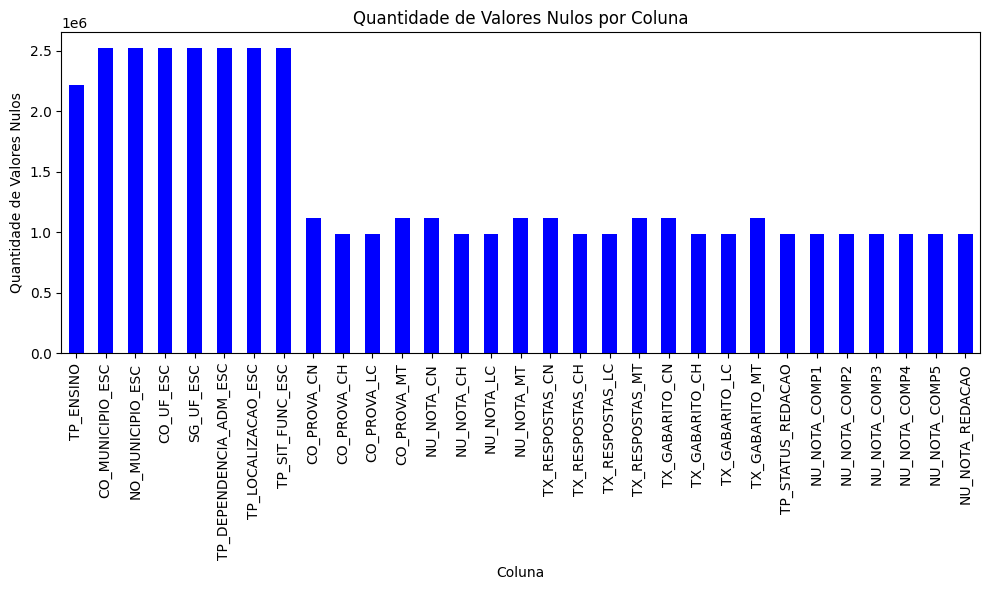

In [4]:
# Exibe a quantidade de valores nulos de cada coluna
null_counts = raw_df.isnull().sum()
null_counts = null_counts[null_counts > 0]

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar', color='blue')
plt.xlabel('Coluna')
plt.ylabel('Quantidade de Valores Nulos')
plt.title('Quantidade de Valores Nulos por Coluna')

# Exibir o gráfico
plt.tight_layout()
plt.show()

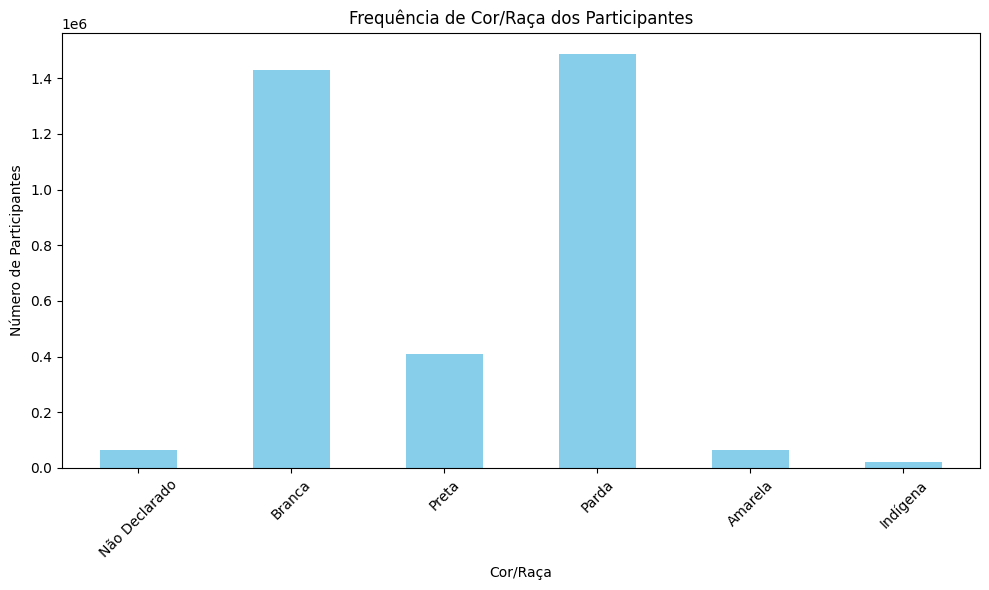

In [5]:
# Calcular a frequência de cor/raça dos participantes
cor_raca_dict = {
    0: 'Não Declarado',
    1: 'Branca',
    2: 'Preta',
    3: 'Parda',
    4: 'Amarela',
    5: 'Indígena'
}
cor_raca_counts = raw_df['TP_COR_RACA'].value_counts().sort_index()
cor_raca_counts.index = cor_raca_counts.index.map(cor_raca_dict)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
cor_raca_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Cor/Raça')
plt.ylabel('Número de Participantes')
plt.title('Frequência de Cor/Raça dos Participantes')

# Exibir o gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

TP_SEXO
F    2120519
M    1355586
Name: count, dtype: int64


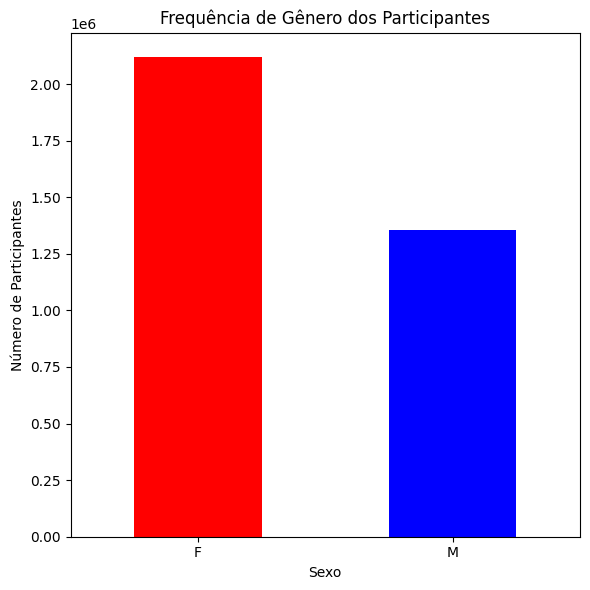

In [6]:
sexo_counts = raw_df['TP_SEXO'].value_counts()
print(sexo_counts)

# Criar o gráfico de barras
plt.figure(figsize=(6, 6))
sexo_counts.plot(kind='bar', color=['red', 'blue'])
plt.xlabel('Sexo')
plt.ylabel('Número de Participantes')
plt.title('Frequência de Gênero dos Participantes')

# Exibir o gráfico
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

TP_ESCOLA
Não Respondeu    2158545
Pública          1105355
Privada           212205
Name: count, dtype: int64


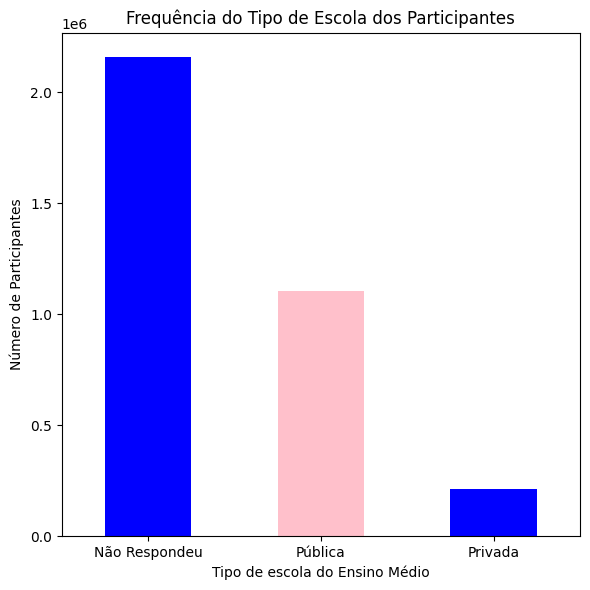

In [7]:
escola_dict = {
    1: 'Não Respondeu',
    2: 'Pública',
    3: 'Privada',
}

escola_counts = raw_df['TP_ESCOLA'].value_counts().sort_index()
escola_counts.index = escola_counts.index.map(escola_dict)
print(escola_counts)

# Criar o gráfico de barras
plt.figure(figsize=(6, 6))
escola_counts.plot(kind='bar', color=['blue', 'pink'])
plt.xlabel('Tipo de escola do Ensino Médio')
plt.ylabel('Número de Participantes')
plt.title('Frequência do Tipo de Escola dos Participantes')

# Exibir o gráfico
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Q010
Não                    1786665
Sim, um                1324150
Sim, dois               317544
Sim, três                39075
Sim, quatro ou mais       8671
Name: count, dtype: int64


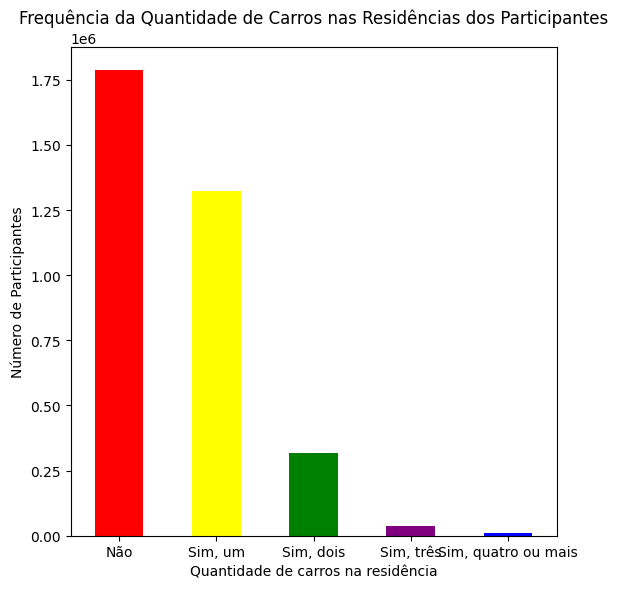

In [8]:
carro_dict = {
    'A': 'Não',
    'B': 'Sim, um',
    'C': 'Sim, dois',
    'D': 'Sim, três',
    'E': 'Sim, quatro ou mais',
}

carro_counts = raw_df['Q010'].value_counts().sort_index()
carro_counts.index = carro_counts.index.map(carro_dict)
print(carro_counts)

# Criar o gráfico de barras
plt.figure(figsize=(6, 6))
carro_counts.plot(kind='bar', color=['red', 'yellow', 'green', 'purple', 'blue'])
plt.xlabel('Quantidade de carros na residência')
plt.ylabel('Número de Participantes')
plt.title('Frequência da Quantidade de Carros nas Residências dos Participantes')

# Exibir o gráfico
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Q025
Não     326373
Sim    3149732
Name: count, dtype: int64


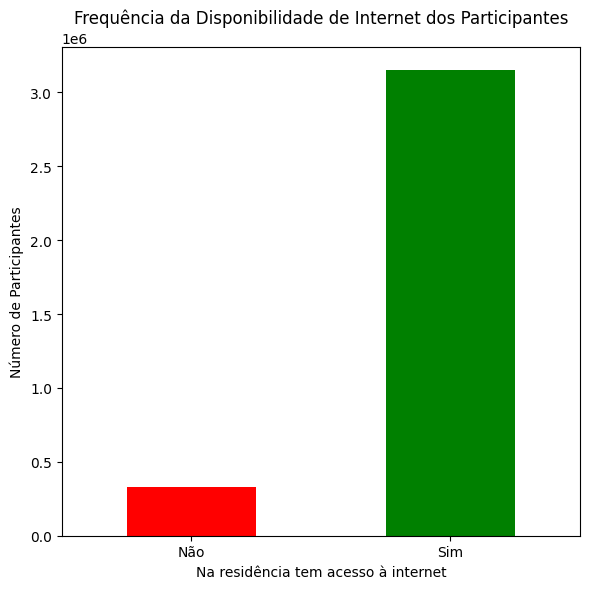

In [9]:
internet_dict = {
    'A': 'Não',
    'B': 'Sim',
}

internet_counts = raw_df['Q025'].value_counts().sort_index()
internet_counts.index = internet_counts.index.map(internet_dict)
print(internet_counts)

# Criar o gráfico de barras
plt.figure(figsize=(6, 6))
internet_counts.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Na residência tem acesso à internet')
plt.ylabel('Número de Participantes')
plt.title('Frequência da Disponibilidade de Internet dos Participantes')

# Exibir o gráfico
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##**3. Data preparation (Preparação dos dados)**

In [10]:
# Dada as colunas de interesse, selecionamos apenas as colunas que serão usadas no projeto
columns_of_interest = ['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_ESCOLA', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC','TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025']

DF = raw_df.filter(columns_of_interest)

del raw_df

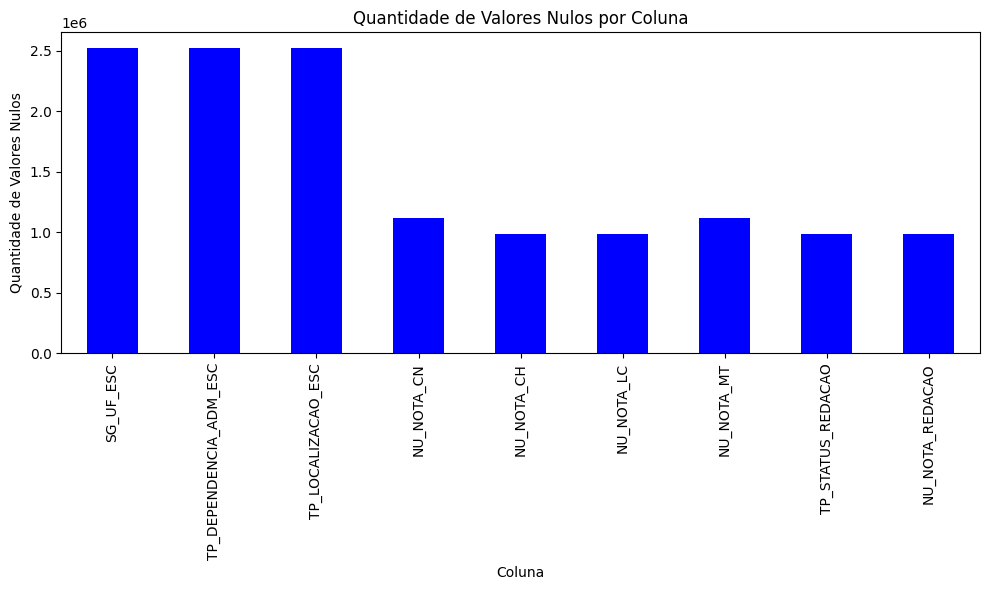

In [11]:
# Exibe a quantidade de valores nulos de cada coluna
null_counts = DF.isnull().sum()
null_counts = null_counts[null_counts > 0]

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar', color='blue')
plt.xlabel('Coluna')
plt.ylabel('Quantidade de Valores Nulos')
plt.title('Quantidade de Valores Nulos por Coluna')

# Exibir o gráfico
plt.tight_layout()
plt.show()

# Dadas algumas colunas com muitos valores nulos, removeremos estas para evitar enviesamentos (bias)
columns_to_remove = ['SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC']
DF.drop(columns=columns_to_remove, inplace=True)

In [12]:
# Adiciona uma coluna com a média das notas de cada participante
DF['NU_NOTA_MEDIA'] = (DF['NU_NOTA_CN'] + DF['NU_NOTA_CH'] + DF['NU_NOTA_LC'] + DF['NU_NOTA_MT'] + DF['NU_NOTA_REDACAO']) / 5

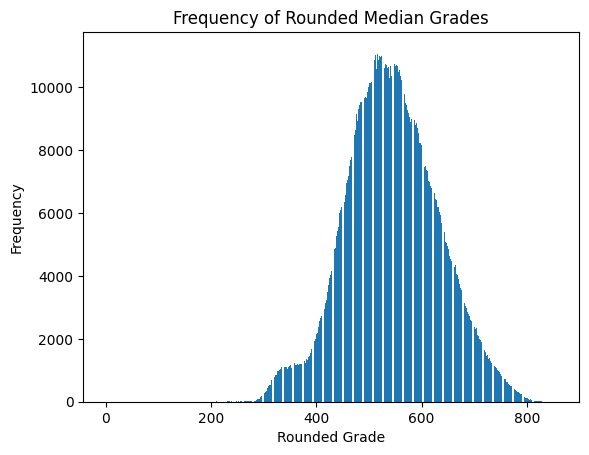

In [13]:
# Exibe a distribuição das notas médias
filtered_df = DF[DF['NU_NOTA_MEDIA'].notna()]
grade_counts = filtered_df['NU_NOTA_MEDIA'].round().astype(int).value_counts().sort_index()
plt.bar(grade_counts.index, grade_counts.values)

plt.xlabel('Rounded Grade')
plt.ylabel('Frequency')
plt.title('Frequency of Rounded Median Grades')

plt.show()

In [14]:
# Encontra a nota de corte das segmentações pré definidas
top_1_percent_grade = filtered_df['NU_NOTA_MEDIA'].round().quantile(0.99)
print('Nota de corte do top 1%: ' + str(top_1_percent_grade))

top_25_percent_grade = filtered_df['NU_NOTA_MEDIA'].round().quantile(0.75)
print('Nota de corte do top 25%: ' + str(top_25_percent_grade))

top_50_percent_grade = filtered_df['NU_NOTA_MEDIA'].round().quantile(0.5)
print('Nota de corte do top 50%: ' + str(top_50_percent_grade))

top_75_percent_grade = filtered_df['NU_NOTA_MEDIA'].round().quantile(0.25)
print('Nota de corte do top 75%: ' + str(top_75_percent_grade))

lowest_valid_grade = filtered_df['NU_NOTA_MEDIA'].round().loc[lambda x: x > 0].min()
print("Nota de corte do top 100%: " + str(lowest_valid_grade))

Nota de corte do top 1%: 750.0
Nota de corte do top 25%: 602.0
Nota de corte do top 50%: 541.0
Nota de corte do top 75%: 485.0
Nota de corte do top 100%: 56.0


In [29]:
# Adiciona uma coluna com o valor categórico de acordo com a nota média

# A -> 1%
# B -> 2% - 25%
# C -> 26% - 50%
# D -> 51% - 75%
# E -> 76% - 100%

def map_num_grade_to_categorical(grade):
  if grade >= top_1_percent_grade:
    return '1'
  elif grade >= top_25_percent_grade:
    return '2'
  elif grade >= top_50_percent_grade:
    return '3'
  elif grade >= top_75_percent_grade:
    return '4'
  elif grade >= lowest_valid_grade:
    return '5'
  else:
    return '6'

DF['TP_NOTA_MEDIA'] = DF['NU_NOTA_MEDIA'].round().apply(map_num_grade_to_categorical)


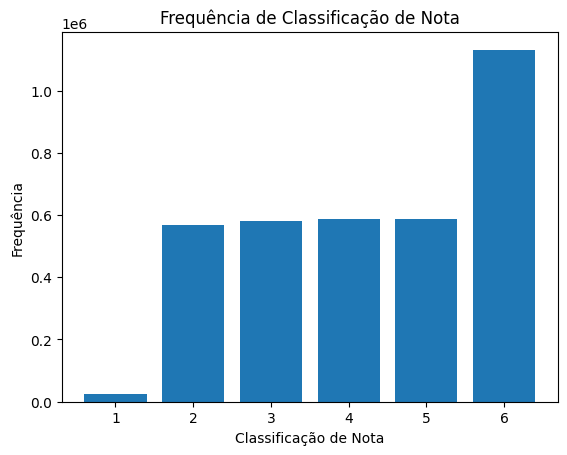

In [30]:
# Exibe a distribuição das classificações de notas
grade_counts = DF['TP_NOTA_MEDIA'].value_counts().sort_index()

plt.bar(grade_counts.index, grade_counts.values)

plt.xlabel('Classificação de Nota')
plt.ylabel('Frequência')
plt.title('Frequência de Classificação de Nota')

plt.show()

##**4. Modeling (Modelagem)**


1.   Explicar brevemente como você elaborou o modelo para o seus dados.
2.   Se a intenção for fazer uma análise comparativa entre algorimtmos criar células markdown ou comentários explicitando onde começa o código referente a cada algoritmo.
3. Explicar (quando pertinente) o fluxo de dados, ou seja como você organizou os dados em treino e teste, como foi o ajuste de parâmetros e eventuais decisões de projeto referentes a modelagem de dados. **Que ajudem a compreender o código.**

O relatório deverá conter essas informações, mas sob a **perspectiva do projeto de dados**

In [42]:
# Considerando o dataset DF, quero minerar os conjuntos frequentes de tamanho 2, 3 e 4 para as colunas TP_NOTA_MEDIA e Q006
# Para isso, é necessário criar um novo dataframe com as colunas de interesse
columns_of_interest = ['TP_NOTA_MEDIA', 'Q006']
DF2 = DF.filter(columns_of_interest)

# Reduzir DF2 para conter apenas as primeiras 500.000 linhas
DF2 = DF2.head(100000)

# Imprima as colunas de DF2
print(DF2.columns)

Index(['Q006', 'TP_NOTA_MEDIA'], dtype='object')


In [43]:
# Importa a biblioteca mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [44]:
# Transforma os dados em uma lista de listas
records = []
print([str(DF2.values[i,j]) for j in range(0, 2)])
print(len(DF2))
for i in range(0, len(DF2)):
    records.append([str(DF2.values[i,j]) for j in range(0, 2)])

['B', '4']
100000


In [45]:
# Instancia o TransactionEncoder
te = TransactionEncoder()
# Executa o TransactionEncoder no dataset
te_ary = te.fit(records).transform(records)
# Transforma o resultado em um dataframe
df = pd.DataFrame(te_ary, columns=te.columns_)
# Imprime o dataframe
print(df)

           1      2      3      4      5      6      A      B      C      D  \
0      False  False  False  False  False   True  False   True  False  False   
1      False  False  False  False  False   True  False  False  False  False   
2      False  False   True  False  False  False  False   True  False  False   
3      False  False  False  False   True  False   True  False  False  False   
4      False  False  False  False  False   True  False   True  False  False   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
99995  False  False  False  False  False   True  False   True  False  False   
99996  False  False  False   True  False  False  False   True  False  False   
99997  False   True  False  False  False  False  False  False  False   True   
99998  False  False  False   True  False  False  False  False  False   True   
99999  False   True  False  False  False  False  False  False  False  False   

       ...      H      I      J      K      L      

In [46]:

# Executa o algoritmo apriori
frequent_itemsets = fpgrowth(df, min_support=0.01, use_colnames=True)
# Imprime o resultado
print(frequent_itemsets)

    support itemsets
0   0.38856      (B)
1   0.29168      (6)
2   0.17454      (3)
3   0.17996      (5)
4   0.08586      (A)
5   0.19585      (C)
6   0.18931      (4)
7   0.15759      (2)
8   0.11554      (D)
9   0.06427      (E)
10  0.03592      (G)
11  0.03259      (F)
12  0.02841      (H)
13  0.01126      (I)
14  0.12272   (B, 6)
15  0.05956   (B, 3)
16  0.03671   (3, C)
17  0.09280   (5, B)
18  0.03013   (5, C)
19  0.02692   (5, A)
20  0.02961   (6, A)
21  0.01662   (A, 4)
22  0.06193   (6, C)
23  0.08079   (B, 4)
24  0.04057   (4, C)
25  0.03226   (B, 2)
26  0.02610   (2, C)
27  0.03260   (6, D)
28  0.02239   (4, D)
29  0.01475   (5, D)
30  0.02461   (3, D)
31  0.02063   (2, D)
32  0.01553   (2, E)
33  0.01495   (3, E)
34  0.01103   (4, E)
35  0.01549   (6, E)
36  0.01194   (G, 2)
37  0.01009   (F, 2)
38  0.01099   (H, 2)


In [47]:
# Executa o algoritmo association_rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
# Imprime o resultado
print(rules)

# Imprime o tamanho do dataframe
print(rules.shape)

# Imprime as regras
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

  antecedents consequents  antecedent support  consequent support  support  \
0         (5)         (B)             0.17996             0.38856   0.0928   

   confidence      lift  leverage  conviction  zhangs_metric  
0     0.51567  1.327131  0.022875    1.262445       0.300589  
(1, 10)
  antecedents consequents  support  confidence      lift
0         (5)         (B)   0.0928     0.51567  1.327131


##**5. Evaluation (Validação)**


**Prevenção de falhas**
(Opcional)


Se o seu dataset for muito grande ou muito grande, ou for muito custoso rodar os algoritmos é indicado que tenha uma célula na qual os resultados parciais possam ser salvos. Evitando, assim ter que re-rodar os algoritmos novamente.